<img src="coco-logo.png" alt="Image" width="500"/>

# Lecture 4: Data Visualization
*Estimated notebook completion time: 1 hour*

<div>
    <img src="https://matplotlib.org/stable/_static/logo_dark.svg" alt="Matplotlib Logo" width="400" style="display:inline-block;"/>
    <img src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg" alt="Seaborn Logo" width="350" style="display:inline-block;"/>
</div>


`matplotlib.pyplot` is a Python library that allows us to generate plots from data quickly and with publication quality.
Each pyplot function makes a change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots lines in a plotting area, decorates the plot with labels, changes the colors, etc.

`seaborn` is a Python library for making **statistical** graphics. It builds on top of matplotlib and integrates closely with pandas data structures. It provides a high-level interface for drawing attractive and informative statistical graphics.

In this lesson we will learn about how to use these two libraries to create plots. 
* How to plot a function
* How to import a data file and how can we plot our data? 
* What different kinds plots can I create? 
* Important plotting tips and good practices for high quality graphs
* How can we save our plot for publishing?

### Importing our libraries

One of the easiest ways to make use of `matplotlib` is through the `pyplot` module, into which is usually imported under the alias `plt`. 


In the case of `seaborn`, we will import it under the alias `sns`


We will also be using numpy and pandas to create and import datasets.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

### Plotting mathematical functions

To graphically visualize a mathematical function that depends on a certain variable, we can create them using `numpy`. 

For example, let's graph the sine function between 0 and 2 $\pi$. 

In [9]:
x = np.linspace(0, 2 * np.pi, 100) # generate 100 evenly spaced values between 0 and 2π 
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

We can evaluate the sine function using all the values in x

In [10]:
y = np.sin(x) # compute the sine of each of these values

Now let's try to plot the sine function!

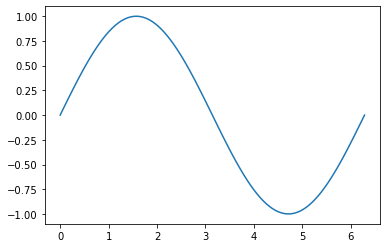

In [11]:
plt.plot(x, y) # x from 0 to 2pi, y = sin(x)
plt.show()

In Matplotlib, `plt.show()` is used to display the plot on the screen. Without calling `plt.show()`, the plot might not be rendered, especially in scripts or non-interactive environments. It ensures that the plot window is opened and the graph is displayed.

The plot we generated has a couple of issues: 

 - *What exactly are we plotting?* 
- *What does each axis represent?* 

These are things that need to be specified in every plot, since they may not be clear to the reader. Let's add the name of the axes and a figure title

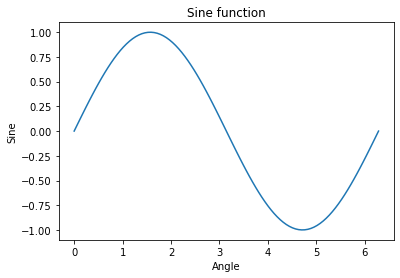

In [12]:
plt.plot(x, y)

# add the name of the axes 
plt.xlabel('Angle')
plt.ylabel('Sine')

# add a title 
plt.title('Sine function')

plt.show()

### Multiple curves in the same plot 

Most of the time we will want to plot several functions or datasets onto the same plot. `plt.plot()` is able to layer different curves simply by calling it repeatedly onto the same graph. 

We can assign each curve with different characteristics, such as `label`, `linestyle` and `color`. This way it's easier to differenciate each of them. To display the labels we need to call the `plt.legend`.

You can check out the different available [linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) and [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) in the `matplotlib` [documentation](https://matplotlib.org/stable/). 

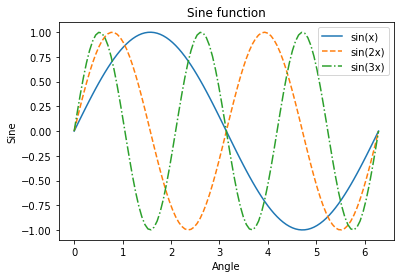

In [13]:
# 1st curve - sin(x)
plt.plot(x, np.sin(x), linestyle="-", label="sin(x)", color="tab:blue")
# 2nd curve - sin(2x)
plt.plot(x, np.sin(2 * x), linestyle="--", label="sin(2x)", color="tab:orange")
# 3th curve - sin(3x)
plt.plot(x, np.sin(3 * x), linestyle="-.", label="sin(3x)", color="tab:green")

# Add the legend 
plt.legend()

# Add the name of x axes 
plt.xlabel('Angle')
# Add the name of y axes 
plt.ylabel('Sine')
# Add a title 
plt.title('Sine function')

plt.show()

### Creating Subplots

Sometimes having all these plots in one single graph may seem overcrowded. 

What we can do to solve this is by creating **subplots**, where we are creating a figure the contains individual plots. For this we can use the pyplot function `subplot`. 

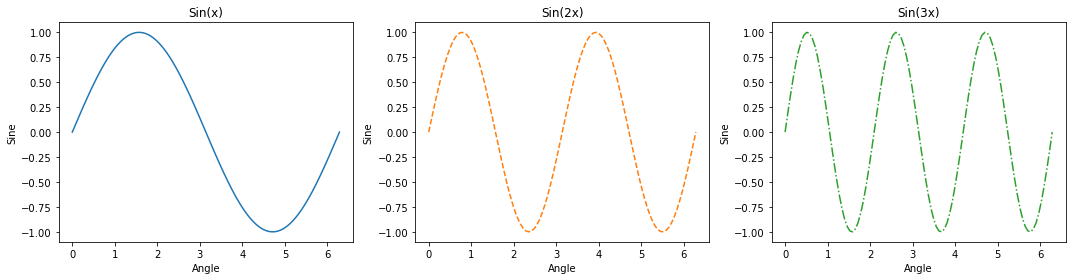

In [19]:
# We want to create a figure with three axis (ax1, ax2 and ax3). 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4)) # 1 row, 3 columns, and a size of 15x4 to fit all three plots

# 1st plot on ax1
ax1.plot(x, np.sin(x), linestyle="-", label="sin(x)", color="tab:blue") 
ax1.set_title('Sin(x)')
ax1.set_xlabel('Angle')
ax1.set_ylabel('Sine')

# 2nd plot on ax2
ax2.plot(x, np.sin(2 * x), linestyle="--", label="sin(2x)", color="tab:orange")
ax2.set_title('Sin(2x)')
ax2.set_xlabel('Angle')
ax2.set_ylabel('Sine')

# 3rd plot on ax3
ax3.plot(x, np.sin(3 * x), linestyle="-.", label="sin(3x)", color="tab:green")
ax3.set_title('Sin(3x)')
ax3.set_xlabel('Angle')
ax3.set_ylabel('Sine')

plt.tight_layout() # adjust layout to prevent overlap

# Show the plot
plt.show()

## Plotting Data

In geoscience we usually work with datasets. As an example we will plot the mean temperature of the planet, from 1850 to 2021. It is available on [Berkeley Earth](https://berkeleyearth.org/), but we will easily access a simplified version from out data file: `data/temperature-berkeley.dat`

For this we will import `Path` from `pathlib`, which helps us create a path to files and folders on our computers. Let's define the path to our temperature file:

- By using `Path`, we ensure that this code can work on various operating systems, no matter what type of directory separator they use (`/` or `\`)

In [26]:
from pathlib import Path

berkeley_data = Path('data/temperature-berkeley.dat')
berkeley_data

WindowsPath('data/temperature-berkeley.dat')

Let's use the `numpy.loadtxt` function to read the file

In [33]:
data = np.loadtxt(berkeley_data)
data

array([[1850.   ,   13.705],
       [1851.   ,   13.822],
       [1852.   ,   13.828],
       [1853.   ,   13.797],
       [1854.   ,   13.851],
       [1855.   ,   13.87 ],
       [1856.   ,   13.748],
       [1857.   ,   13.608],
       [1858.   ,   13.762],
       [1859.   ,   13.831],
       [1860.   ,   13.748],
       [1861.   ,   13.645],
       [1862.   ,   13.554],
       [1863.   ,   13.78 ],
       [1864.   ,   13.752],
       [1865.   ,   13.866],
       [1866.   ,   13.931],
       [1867.   ,   13.954],
       [1868.   ,   13.934],
       [1869.   ,   13.943],
       [1870.   ,   13.848],
       [1871.   ,   13.827],
       [1872.   ,   13.859],
       [1873.   ,   13.891],
       [1874.   ,   13.833],
       [1875.   ,   13.783],
       [1876.   ,   13.784],
       [1877.   ,   14.164],
       [1878.   ,   14.27 ],
       [1879.   ,   13.919],
       [1880.   ,   13.859],
       [1881.   ,   13.964],
       [1882.   ,   13.901],
       [1883.   ,   13.854],
       [1884. 

We can extract the columns corresponding `years` and temperatures from the array individually

In [34]:
years, temperature = data[:,0], data[:,1] # first column is the years, second column is the temperature

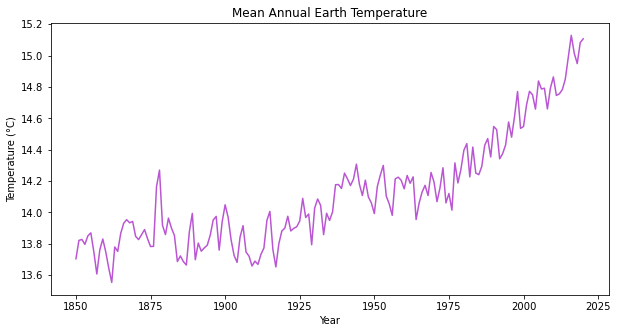

In [46]:
# plot the data
plt.figure(figsize=(10, 5)) # set the size of the figure
plt.plot(years, temperature, color='mediumorchid')

# add the name of the axes and title
plt.xlabel('Year') 
plt.ylabel('Temperature (°C)') 
plt.title('Mean Annual Earth Temperature') 
plt.show()


We can now save the plot as a `png` or `jpeg` image. If we wanted to we could also export it as a `pdf` or `svg` (vectorial image)

We could have also used `seaborn` to make the exact same plot as well, here's how:

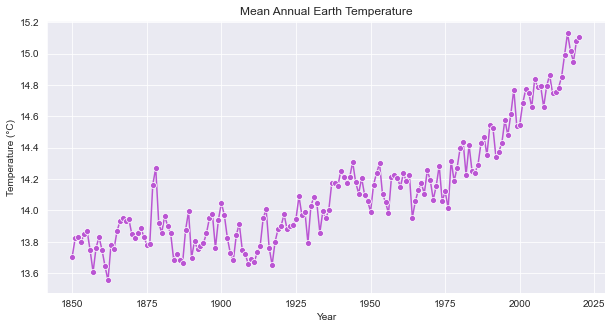

In [76]:
# plot the data using seaborn
plt.figure(figsize=(10, 5))  # set the size of the figure
sns.set_style("darkgrid")  # set the style of the plot
sns.lineplot(x=years, y=temperature, marker='o', color='mediumorchid')

# add the name of the axes and title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Annual Earth Temperature')

# add a grid
plt.grid(True)

# save the plot in different formats in the 'plots' folder
plt.savefig('plots/temperature_plot.png', dpi=300)  # save as png with a resolution of 300 dpi
plt.savefig('plots/temperature_plot.pdf')  # save as pdf

plt.show()

## Different types of plots:
Matplotlib and Seaborn allows us to make multiple types of plots, we will do a couple of examples using both libraries

### Scatter Plot

Mencionar el twin axis 

### Histogram

### Pie Chart

### Bar Plots

### Box Plot

### Violin Plot

### Heat Maps

### Rasterio ** pending